In [30]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
cur_dir = os.getcwd()


# Why reshape required??
Each image (instance) in the dataset has 784 pixels (features) and value of each feature(pixel) ranges from 0 to 255, this range is too wide, hence we have performed Normalization on the training and test dataset, by dividing the pixels by 255, so that values of all features (pixels) are in a small range (0 to 1).

In [22]:
class LoadData():
    def __init__(self):
        self.data_train = pd.read_csv(os.path.join(cur_dir,'data',"fashion-mnist_train.csv"))
        self.data_test = pd.read_csv(os.path.join(cur_dir,'data',"fashion-mnist_test.csv"))
        
        self.x_train = np.array(self.data_train.iloc[:,1:])
        self.y_train = np.array(self.data_train.iloc[:,0])
        
        self.x_test = np.array(self.data_test.iloc[:,1:])
        self.y_test = np.array(self.data_test.iloc[:,0])
        
    def reshape_data(self):
        img_rows, img_cols = 28, 28
        print("Before: ")
        print(self.x_train.shape,self.y_train.shape)
        print(self.x_test.shape,self.y_test.shape)
        
        self.x_train = self.x_train.reshape(self.x_train.shape[0],img_rows,img_cols,1).astype('float32')
        self.x_test = self.x_test.reshape(self.x_test.shape[0],img_rows,img_cols,1).astype('float32')
        self.x_train /= 255
        self.x_test /= 255
        
        print("After: ")
        
        
        self.y_train = keras.utils.to_categorical(self.y_train)
        self.y_test = keras.utils.to_categorical(self.y_test)
        self.num_classes = self.y_test.shape[1]
        print(self.x_train.shape,self.y_train.shape)
        print(self.x_test.shape,self.y_test.shape)
        print("total classes: ",self.num_classes)


In [23]:
ld_obj = LoadData()
ld_obj.reshape_data()

Before: 
(60000, 784) (60000,)
(10000, 784) (10000,)
After: 
(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)
total classes:  10


In [26]:
class DesignModel():
    def __init__(self):
        self.model = None
        self.history = None
        self.x_train = ld_obj.x_train
        self.y_train = ld_obj.y_train
        
        self.x_test = ld_obj.x_test
        self.y_test = ld_obj.y_test
        self.num_classes = ld_obj.num_classes
        print(self.num_classes)


    def create_model(self):
        self.model = keras.Sequential()
        self.model.add(keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(28,28,1)))
        #self.model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
        #self.model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
        self.model.add(keras.layers.MaxPool2D((2,2)))
        self.model.add(keras.layers.Flatten())
        #self.model.add(keras.layers.Dense(128, activation='relu'))
        self.model.add(keras.layers.Dense(self.num_classes, activation='softmax'))
        print(self.model.summary())
    
    def compile_model(self):
        self.model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
    
    def train_model(self,batch_size,epochs):
        self.history = self.model.fit(self.x_train,self.y_train,epochs=epochs,
                                      batch_size=batch_size,verbose=2,
                                      validation_data = (self.x_test,self.y_test),shuffle=True)

In [27]:
epochs = 20
batch_size = 512

model_obj = DesignModel()
model_obj.create_model()
model_obj.compile_model()
model_obj.train_model(batch_size,epochs)

10
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 8s - loss: 0.7585 - acc: 0.7453 - val_loss: 0.5155 - val_acc: 0.8222
Epoch 2/20
60000/60000 - 8s - loss: 0.4608 - acc: 0.8392 - val_loss: 0.4419 - val_acc: 0.8507
Ep

In [42]:
class EvaluateModel():
    def __init__(self,history):
        self.history = history
        
    def plot_acc_loss(self):
        epochs = self.history.epoch
        acc = self.history.history.get('acc')
        loss = self.history.history.get('loss')

        print(epochs,loss,acc)
        plt.plot(epochs, acc, 'b', label='Training accuracy')
        plt.title('Training accuracy')

        plt.figure()

        plt.plot(epochs, loss, 'b', label='Training Loss')
        plt.title('Training loss')
        plt.legend()

        plt.show()
        

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] [0.7584712532202402, 0.4608262265364329, 0.4146583351135254, 0.38645398729642233, 0.36608912703196206, 0.35536417484283445, 0.3414847196420034, 0.33092890621821086, 0.3243394662062327, 0.31538746240933735, 0.30921017780303955, 0.3014226946512858, 0.29687101426124574, 0.29125430234273275, 0.2861961757659912, 0.28202810535430906, 0.2764528968334198, 0.27253987301190696, 0.2663149642864863, 0.26377824630737307] [0.7453, 0.83918333, 0.85511667, 0.8662, 0.87365, 0.87655, 0.88145, 0.88465, 0.88846666, 0.8911667, 0.89175, 0.895, 0.89661664, 0.8980833, 0.8994167, 0.90175, 0.9027, 0.9051667, 0.90655, 0.9077333]


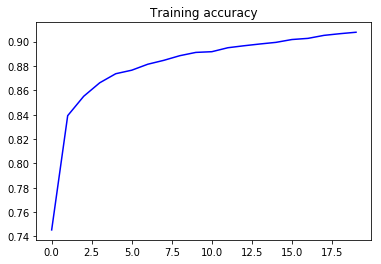

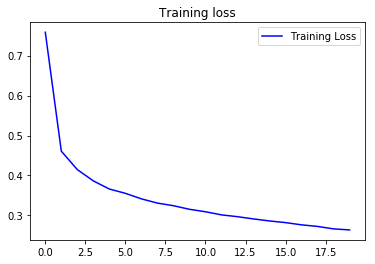

In [43]:
eval_obj = EvaluateModel(model_obj.history)
eval_obj.plot_acc_loss()

Image: 


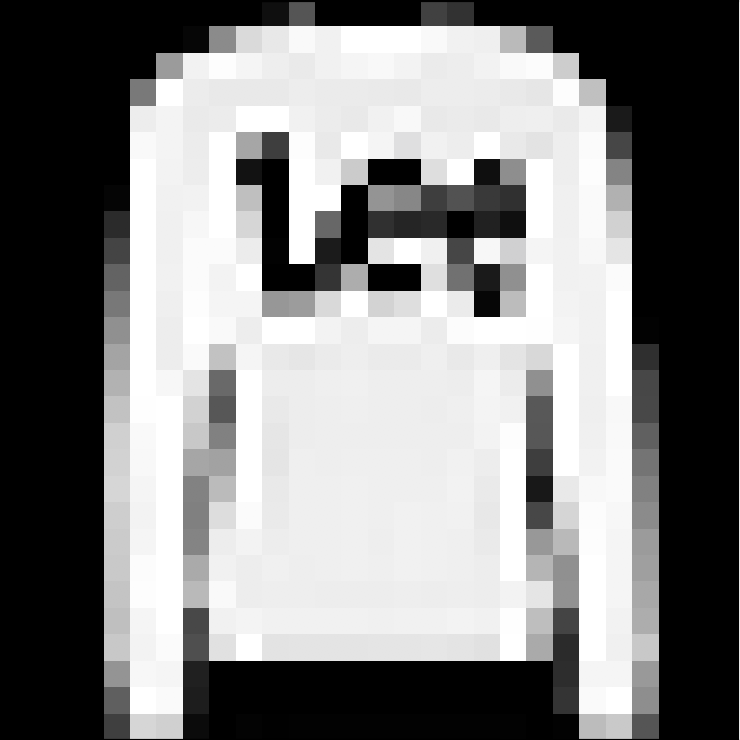

Predition Label:  Pullover 



In [51]:
from PIL import Image
from IPython.display import Image as IMG


class Prediction():
    
    def __init__(self,model):
        self.model = model
        labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
        self.labels = {k:labels[k] for k in range(len(labels))}
    
    def predict(self,image):
        img = Image.open(image)
        print("Image: ")
        display(IMG(filename=image))
        img = img.convert("L")
        img = img.resize((28,28))
        im2arr = np.array(img)
        im2arr = im2arr.reshape(1,28,28,1)
        y_pred = self.model.predict(im2arr)
        return y_pred
        
pred_obj = Prediction(model_obj.model)
files = None

for r,d,f in os.walk(os.path.join(cur_dir,"Test_Data")):
    files = f
for item in files:
    result = pred_obj.predict(os.path.join(cur_dir,"Test_Data",item))
    print("Predition Label: ",pred_obj.labels[result.argmax()],'\n')